In [1]:
from __future__ import division
from scipy.stats import norm
from IPython.display import HTML
from IPython.display import display
from scipy.optimize import *
from scipy.special import erf
from scipy import stats
import numpy as np, pandas as pd, matplotlib.pyplot as plt

## Question 1: Linear Regression (10 marks) 
Data collected in an experiment of the photoelectric effect are listed below.

\begin{array}{lcccc}
\hline
{\rm frequency, f/10^{15} Hz} &1.18&0.96&0.82&0.74\\
{\rm energy, E_{k, max}/10^{-19} J} &3.12&1.57&0.8&0.22\\
{\rm error, E_{k, max}/10^{-19} J}   &0.05&0.04&0.11&0.09\\
\hline
\end{array} 



According to Einstein's formulation, the maximum kinetic energy ($E_{k, max}$) of the resulting electrons is related to the frequency  ($f$) of the incoming light as <br>

\begin{equation}
E_{k, max}=hf-W
\end{equation}

where $h$ is Planck's constant and $W$ is the minimum energy required to remove the electrons from the illuminated surface. <br>
(i) Make a plot of the energy versus frequency from the table above, keeping in mind the elements that make a good plot. <br>
(ii) Calculate the slope and intercept of the best-fit straight line to the data, and their associated errors. <br>
(iii) What is the value of Planck's constant and its error you obtain using the data from this experiment?<br>
(iv) Planck's constant is one of the fundamental physical constants and its value is 6.62607015$\times$10$^{-34}$ J Hz$^{-1}$.  Is the value deduced from your linear fit consistent with the expected value? <br>
(v) How would you report the resulting value for $h$?


### (i) Make a plot of the energy versus frequency from the table above, keeping in mind the elements that make a good plot.


In [2]:
# this is the data for this exercise
data = pd.read_csv('speed.csv')
frequency = np.array(data.iloc[:,0])
energy = np.array(data.iloc[:,1])
energy_error = data.iloc[:,2]

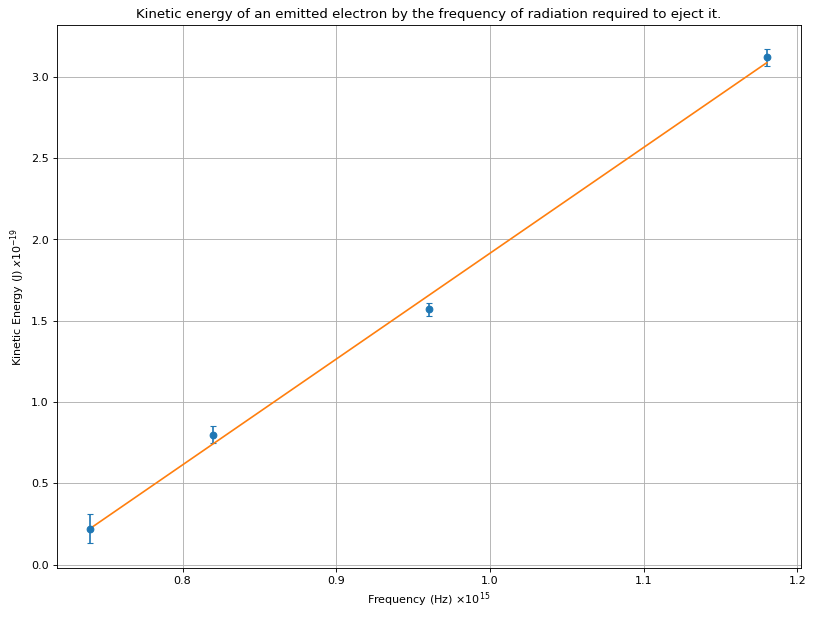

In [3]:
# Create figure
plt.figure(figsize=(12, 9), dpi=80)

# Plot data
plt.errorbar(frequency, energy, yerr = energy_error, fmt='o', capsize=2.5)

# Find and fit line of best fit for the data
m, c = np.polyfit(frequency, energy, 1)
plt.plot(frequency, m * frequency + c)

# Customise the graph
plt.xlabel(r'Frequency (Hz) $\times10^{15}$')
plt.ylabel('Kinetic Energy (J) $x10^{-19}$')
plt.title("Kinetic energy of an emitted electron by the frequency of radiation required to eject it.")
plt.grid()

plt.show()

### (ii) Calculate the slope and intercept of the best-fit straight line to the data, and their associated errors.


In [4]:
def linear(frequency, m, c):
    return frequency * m + c

def one_ii():
    '''Your function should return the gradient,gradient_error,intercept,intercept_error.
    Please make sure that the answer is a list/array of four floats'''
    popt, pcov = curve_fit(linear, frequency, energy, sigma = energy_error)   # Use curve_fit function 
    perr = np.sqrt(np.diag(pcov))   # Get errors from diagonal elements of covariance matrix
    # Assign values to parameters
    gradient = popt[0]
    gradient_error = perr[0]
    intercept = popt[1]
    intercept_error = perr[1]

    return(gradient, gradient_error,intercept,intercept_error)

print(one_ii())

(6.505767580814904, 0.3011408494845963, -4.602012946082842, 0.2933652071560121)


### (iii) What is the value of Planck's constant and it's error you obtain using the data from this experiment?


$$(6.5 \pm 0.3) \times10^{-34} \text{J Hz}^{-1}$$

### (iv) Planck's constant is one of the fundamental physical constants and its value is 6.62607015$\times$10$^{-34}$ J Hz$^{-1}$.  Is the value deduced from your linear fit consistent with the expected value?

Yes, the value deduced is within error of the expected value.

### (v) How would you report the resulting value for $h$?

The deduced value of Planck's constant is (6.5. ± 0.3) x10$^{-34}$ J Hz$^{-1}$.

The result is limited by the error which, for so few data points should be reported to 1 significant figure.

## Question 2: Pixels in an image (10 marks + 2 bonus)

An astronomer just received a new image from a telescope. The image has 2048 $\times$ 2048 pixels, with a mean  background count of $\bar N = $50. Upon looking at the image, the astronomer sees that there is one pixel which has a value of 86 counts, so it is brighter than the mean pixel value.
In this exercise you will have to determine the significance of the signal in this pixel: is it real, or should the astronomer discard it as a fluke signal? 

> (i)  How many pixels, $N$, are there in the image?  
<bf>
> (ii) What is the standard deviation of the background? (Hint: assume a Poisson distribution).<br>
<bf>
> (iii) Plot the the distribution of the background pixel values of the image using a histogram. When plotting the histogram, keep in mind the elements that make a good plot.<br>
(iv) Determine how many standard deviations the bright pixel is from the mean, and use vertical lines to clearly indicate the location of the 1$\sigma$, 2$\sigma$ and 3$\sigma$ intervals on your histogram. <br>
(v) Remember the "5$\sigma$ level of certainty" discussed in Lecture 1: for a normal distribution, the probability of finding a data point above 5$\sigma$ is about about 1 in 3.5 million, i.e. $\sim 3\times 10^{-7}$. Why can you use the confidence limits for a normal distribution here, despite the fact that you are looking at a Poisson distribution? Is this pixel compatible with a 5$\sigma$ detection, i.e., is the pixel significant? <br>
(vi) Given the number of pixels in the image, calculate how many pixels you would expect above 5$\sigma$.<br>
Based on the result, reconsider the significance of the bright pixel.<br>
Bonus: The astronomer gets an image from a different telescope, where the instrument only has 400$\times$400 pixels. How would your answer change, if all other parameters are the same as above?    

### (i) How many pixels, $N$, are there in the image?


In [9]:
def two_i():
    return 2048*2048

print(two_i())

4194304


### (ii) What is the standard deviation of the background? (Hint: assume a Poisson distribution)

In [11]:
def two_ii():
    return np.sqrt(50)

print(two_ii())

7.0710678118654755


### (iii) Plot the the distribution of the background pixel values of the image using a histogram. When plotting the histogram, keep in mind the elements that make a good plot.

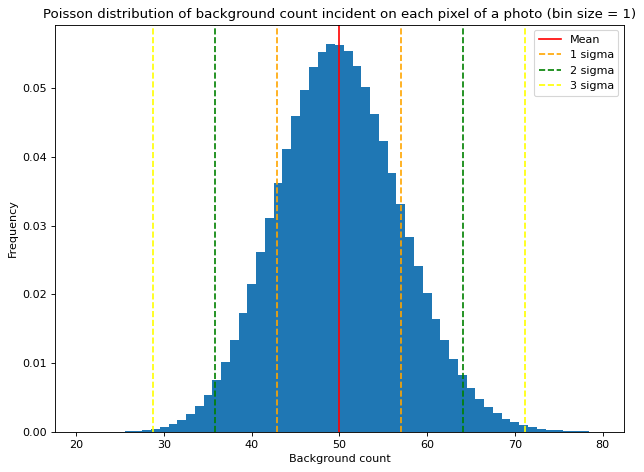

In [13]:
def five_i_and_ii():

    mean = 50
    stdev = np.sqrt(mean)
    
    # Create figure
    plt.figure(figsize=(8, 6), dpi=80)

    # Create poisson distribution data given mean and size.
    poisson_data = np.random.poisson(lam = mean, size = two_i())
    # Plot histogram
    plt.hist(poisson_data, density = True, bins = np.arange(20.5, 80.5,1)) # Note the 0.5 shift to centre bins on integer axis values
    
    # Customise graph
    plt.ylabel('Frequency')
    plt.xlabel('Background count')
    plt.ylim(0)
    plt.title("Poisson distribution of background count incident on each pixel of a photo (bin size = 1)")
    
    # Plot mean constant line
    plt.axvline(x=mean, color="red", label="Mean")
    
    # Plot 1 std dev constant line
    plt.axvline(x=mean+stdev, color="orange", label = "1 sigma", linestyle="dashed")
    plt.axvline(x=mean-stdev, color="orange", linestyle="dashed")
    
    # Plot 2 std dev constant line
    plt.axvline(x=mean+2*stdev, color="green", label = "2 sigma", linestyle="dashed")
    plt.axvline(x=mean-2*stdev, color="green", linestyle="dashed")
    
    # Plot 3 std dev constant line
    plt.axvline(x=mean+3*stdev, color="yellow", label = "3 sigma", linestyle="dashed")
    plt.axvline(x=mean-3*stdev, color="yellow", linestyle="dashed")
    
    plt.tight_layout()
    plt.legend()
    plt.show()
    
five_i_and_ii()

### (iv) i. Determine how many standard deviations the bright pixel is from the mean.

In [14]:
def two_iv():
    N = 86
    mean = 50
    stdev = np.sqrt(mean)
    
    return (N - mean) / stdev

print(two_iv())

5.091168824543142


### (iv) ii. Update your plot using vertical lines to clearly indicate the location of the 1 𝜎 , 2 𝜎  and 3 𝜎  intervals on your histogram.

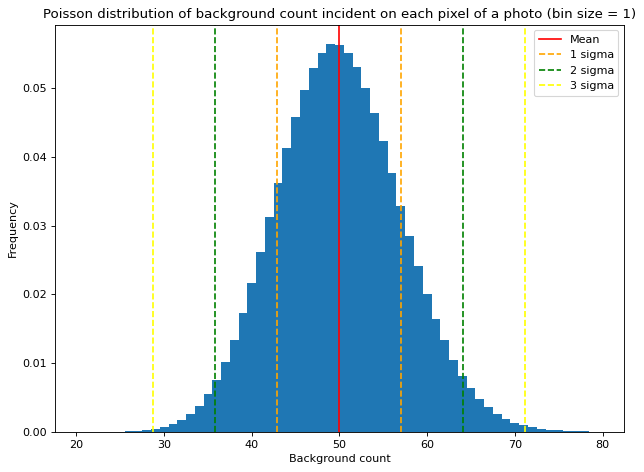

In [16]:
mean = 50
stdev = np.sqrt(mean)

# Create figure
plt.figure(figsize=(8, 6), dpi=80)

# Create poisson distribution data given mean and size.
poisson_data = np.random.poisson(lam = mean, size = two_i())
# Plot histogram
plt.hist(poisson_data, density = True, bins = np.arange(20.5, 80.5,1)) # Note the 0.5 shift to centre bins on integer axis values

# Customise graph
plt.ylabel('Frequency')
plt.xlabel('Background count')
plt.ylim(0)
plt.title("Poisson distribution of background count incident on each pixel of a photo (bin size = 1)")

# Plot mean constant line
plt.axvline(x=mean, color="red", label="Mean")

# Plot 1 std dev constant line
plt.axvline(x=mean+stdev, color="orange", label = "1 sigma", linestyle="dashed")
plt.axvline(x=mean-stdev, color="orange", linestyle="dashed")

# Plot 2 std dev constant line
plt.axvline(x=mean+2*stdev, color="green", label = "2 sigma", linestyle="dashed")
plt.axvline(x=mean-2*stdev, color="green", linestyle="dashed")

# Plot 3 std dev constant line
plt.axvline(x=mean+3*stdev, color="yellow", label = "3 sigma", linestyle="dashed")
plt.axvline(x=mean-3*stdev, color="yellow", linestyle="dashed")

plt.tight_layout()
plt.legend()
plt.show()

### (v) Remember the "5$\sigma$ level of certainty" discussed in Lecture 1: for a normal distribution, the probability of finding a data point above 5$\sigma$ is about about 1 in 3.5 million, i.e. $\sim 3\times 10^{-7}$. Why can you use the confidence limits for a normal distribution here, despite the fact that you are looking at a Poisson distribution? Is this pixel compatible with a 5$\sigma$ detection, i.e., is the pixel significant?

As we have many data points, our Poisson distribution becomes more closely described by a normal distribution. This pixel is not significant as although it is above 5 sigma, we have such a large number of data points that a measurement of this deviation is to be expected. (As we have ~4.2 million pixels, you would expect at least a 5 sigma detection given that is 1 in 3.5 million).

### (vi) i. Given the number of pixels in the image, calculate how many pixels you would expect above 5$\sigma$. 

In [17]:
def two_vi(pixels = two_i()):
    mean = 50
    stdev = np.sqrt(mean)
    
    x = ((mean + (5 * stdev)) - mean) / ((np.sqrt(2) * stdev))
    above_5sigma = 0.5 * (1 - erf(x))
    pixels_above_5sigma = above_5sigma * pixels
    
    return pixels_above_5sigma

print(two_vi())

1.2023038344923407


### (vi) ii. Based on the result, reconsider the significance of the bright pixel.

The bright pixel does not appear anomalous based on the above analysis - the pixel is insignificant as we would expect 1.2 pixels of that brightness given the size of our dataset, a 5 sigma pixel is expected.

### Bonus: The astronomer gets an image from a different telescope, where the instrument only has 400$\times$400 pixels. How would your answer change, if all other parameters are the same as above?  

As this image has only 160,000 pixels, the probability of a 5 sigma event occuring is much lower (see cell below) - approximately 1 in 22 chance of observing a 5 sigma event. Thus the pixel would not be statistically significant in the 400x400 case.

In [19]:
# Returns expected number of pixels with background count above 5 sigma for 400x400 image case.
two_vi(pixels=400*400)

0.045864251498883846

## Question 3: $\chi^2$ minimisation (10 marks + 2 bonus)

Some students take a spectrum of an M dwarf star. The spectra of such stars show hydrogen emission from the Balmer series, the most prominent emission line being the H$\alpha$ line at about 6562.8 <span>&#8491;</span>.
The data is coming from a csv file with three (comma-separated) columns, the first one corresponds to the wavelength (in Angstrom, <span>&#8491;</span>), the second corresponds to the measured flux (in units of 10$^{-14}$ erg cm$^{-1}$ s$^{-2}$ <span>&#8491;</span>$^{-1}$), and the third is the flux error.

(i) Plot the spectrum i.e., make a plot of the flux versus the wavelength.<br>
(ii) Perform a $\chi^2$ minimisation using a Gaussian model for the H$\alpha$ emission line. What are the best-fit parameters, and the value of $\chi^2_{min}$?<br>
(iii) What is the value of $\chi^2_{\rm \nu}$?<br>
(iv) What is the probability one would obtain a value of $\chi^2$ equal to, or greater than, $\chi^2_{\rm min}$ assuming that the data are described by the model?<br>
(v) Plot the best fit Gaussian model on top of the data. Then, plot the residuals of the model fit and discuss what you observe.<br>
(vi) Repeat steps (ii)-(v) but using a Voigt model instead of a Gaussian.<br>
(vii) Finally, comment on the differences between the two fits.<br>
Bonus: What could you do to further improve the fit?



### (i) Plot the spectrum i.e., make a plot of the flux versus the wavelength.

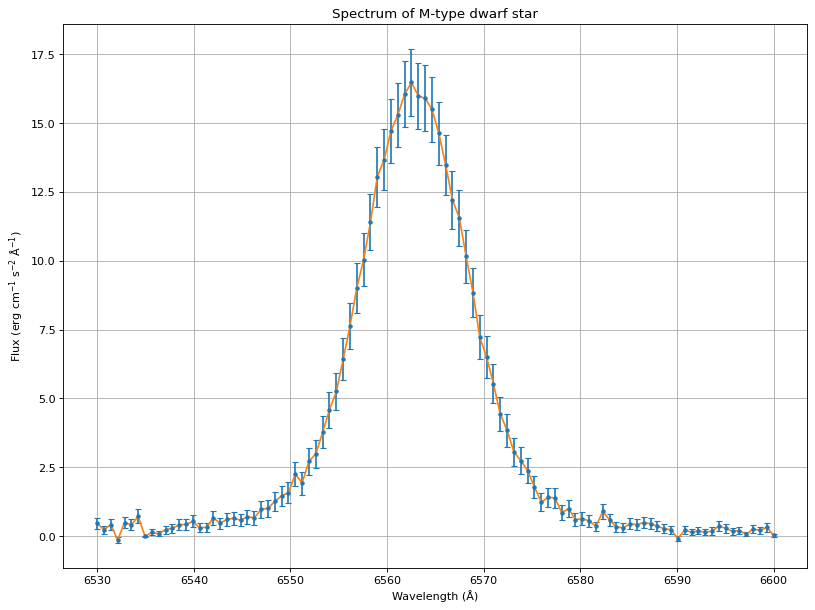

In [20]:
# Read data
df = pd.read_csv("ha_line.csv")
wavelength = df.iloc[:,0]
flux = df.iloc[:,1]
flux_errors = df.iloc[:,2]

# Create plot figure
plt.figure(figsize=(12, 9), dpi=80)

# Plot data
plt.errorbar(wavelength, flux, yerr = flux_errors, fmt="o", ms=3, capsize=2.5)
plt.plot(wavelength, flux)
plt.grid()

# Customise the graph
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (erg cm$^{−1}$ s$^{−2}$ Å$^{−1}$)")
plt.title("Spectrum of M-type dwarf star")

plt.show()

### (ii) Perform a $\chi^2$ minimisation using a Gaussian model for the H$\alpha$ emission line. What are the best-fit parameters (amplitude, mean, and standard deviation), and the value of $\chi^2_{min}$?


In [21]:
def gaussian(parameters):
    amplitude, mean, stdev = parameters
    return amplitude * np.exp(-(((wavelength - mean) ** 2) / (2 * (stdev ** 2))))

def chisqfunc_gauss(parameters):
    '''Gaussian chi-square'''
    return np.sum(((flux - gaussian(parameters))**2) / (flux_errors**2))   # Formula for chisq

In [22]:
'''write a function called three_ii which performs a chi-square minimisation based on the chisqfunc_gauss function 
from the previous step. The function should return an array containing the best fit Gaussian amplitude, 
mean, and standard deviation, as well as the minimsed chi-square'''

def three_ii():
    '''Please make sure that the answer is a list/array of the type [[best_fit_parameters_gauss], min_chisq_gauss]'''
    mean_approx = 6562.8   # Use peak wavelength as initial guess for mean
    sigma_approx = np.sqrt(mean_approx)   # Use sqrt(mean) as initial guess for sigma
    amp_approx = 1
    
    parameters = np.array([amp_approx, mean_approx, sigma_approx])   # Array of initial guesses
    
    result = minimize(chisqfunc_gauss, parameters)   # Use minimise function to minimise chisqfunc_gauss defined above
    
    best_fit_parameters_gauss = result.x.tolist()
    min_chisq_gauss = result.fun

    return [best_fit_parameters_gauss, min_chisq_gauss]
    
print(three_ii())

[[15.022504358190098, 6562.852781168339, 6.122133874900669], 212.1491877968397]


### (iii) What is the value of $\chi^2_{\rm \nu}$?

In [25]:
def three_iii():
    '''your function should return the value of the reduced chi-square'''
    N = len(flux)   # Number of data points
    n = len(three_ii()[0])   # Number of parameters in model
    df = N - n   # Degrees of freedom
    
    chisq_red_gauss = three_ii()[1] / df
    
    return chisq_red_gauss

print(three_iii())

2.187105028833399


### (iv) What is the probability one would obtain a value of $\chi^2$ equal to, or greater than, $\chi^2_{\rm min}$ assuming that the data are described by the model?

In [27]:
def three_iv():

    N = len(flux)   # Number of data points
    n = len(three_ii()[0])   # Number of parameters in model
    df = N - n   # Degrees of freedom
    
    # The below definitions are from Measurements and their Uncertainties, which states that the chisq probability
    # distribution has mean=df, stdev=sqrt(2df)
    chisq_mean = df
    chisq_stdev = np.sqrt(2*df)
    chisq_min = three_ii()[1]
    
    k = df / 2   # Define k to simplify below equation
    
    # Probability of randomly choosing chisq == chisq_min
    X_chisq_min = ((chisq_min ** (k - 1)) * np.exp( -float(chisq_min) / 2)) / ((2 ** k) * np.math.factorial(np.round(k,0)-1))
    
    # Find distance of chisq_min from mean
    z = (chisq_mean - X_chisq_min) / chisq_stdev
    
    # Calculate probability of chisq being above chisq_min
    x = ((chisq_mean + (z * chisq_stdev)) - chisq_mean) / ((np.sqrt(2) * chisq_stdev))
    above_Zsigma = 1 - (0.5 * (1 + erf(x)))
    
    return above_Zsigma
    
print(three_iv())

1.6514567491299204e-12


### (v) Plot the best fit Gaussian model on top of the data. Then, plot the residuals of the model fit and discuss what you observe.

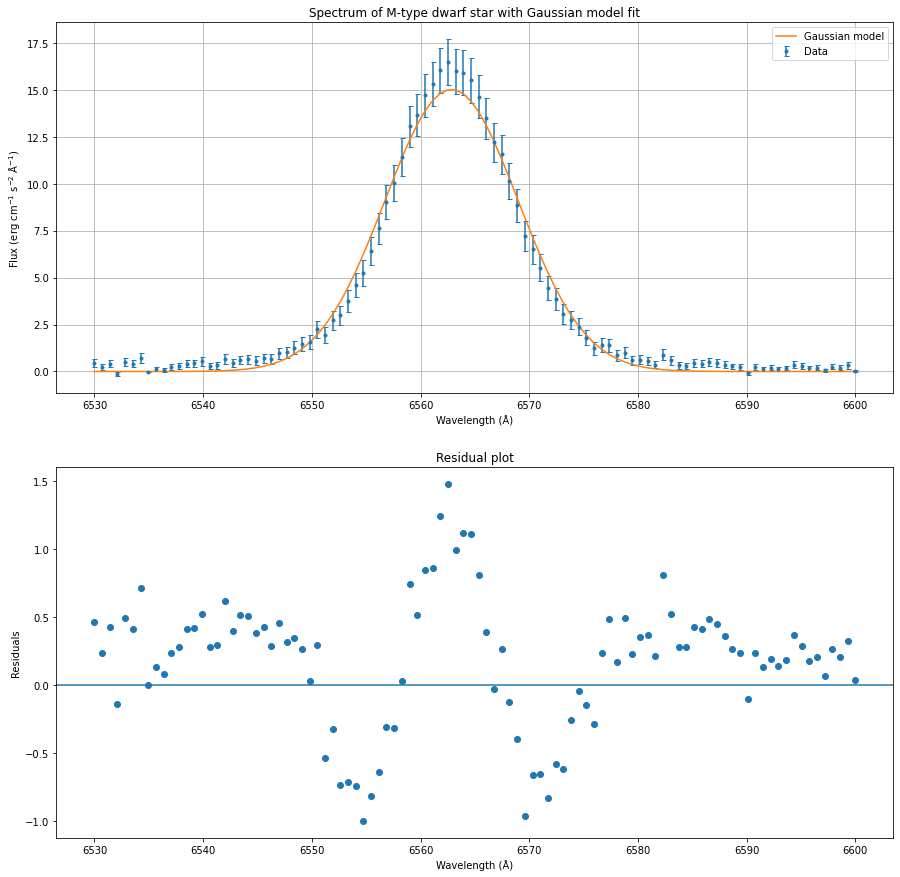

In [29]:
# Create the figure and subplots
fig, ax = plt.subplots(nrows=2, figsize=(15,15))

# Plot the best fit gaussian over the data
ax[0].errorbar(wavelength, flux, label = 'Data', yerr=flux_errors, fmt='o',capsize=2.5, ms=3)
ax[0].plot(wavelength, gaussian(three_ii()[0]), label = 'Gaussian model')
ax[0].set_xlabel('Wavelength (Å)')
ax[0].set_ylabel('Flux (erg cm$^{−1}$ s$^{−2}$ Å$^{−1}$)')
ax[0].set_title("Spectrum of M-type dwarf star with Gaussian model fit")
ax[0].legend()
ax[0].grid()

''' Note residuals are not normalised as per question'''
# Plot the residuals
residuals = (flux - gaussian(three_ii()[0]))    # / flux_errors
ax[1].scatter(wavelength, residuals)
ax[1].set_ylabel("Residuals")
ax[1].set_xlabel("Wavelength (Å)")
ax[1].set_title("Residual plot")
ax[1].axhline(0)

The residuals have a visible correlation indicating that the paramaters do not entirely describe the data; a more complex model with additional parameters may be a better choice.

### (vi) Repeat steps (ii)-(v) but using a Voigt model instead of a Gaussian.

### (vi) i. Perform a $\chi^2$ minimisation using a Voigt model for the H$\alpha$ emission line. What are the best-fit parameters (amplitude, center, sigma, and gamma), and the value of $\chi^2_{min}$?

In [30]:
from scipy.special import wofz #this is needed to define the Voigt profile

'''write the code to calculate chi-square for the given Voigt profile'''

def voigt(parameters):
    amplitude, center, sigma, gamma = parameters

    peak = amplitude*(sigma*np.sqrt(2*np.pi))
    
    return peak*np.real(wofz(((wavelength-center) + 1j*gamma)/sigma/np.sqrt(2))) / sigma/np.sqrt(2*np.pi)
    
    
def chisqfunc_voigt(parameters):
    '''Voigt chi-square'''
    return np.sum(((flux - voigt(parameters))**2) / (flux_errors**2))   # Formula for chisq


In [31]:
'''write a function called three_vi_i which performs a chi-square minimisation based on the chisqfunc_voigt function 
from the previous step, and returns an array containing the best fit Voigt amplitude, center, sigma, and gamma, 
as well as the minimsed chi-square'''

def three_vi_i():
    '''Please make sure that the answer is a list/array of the type [[best_fit_parameters_voigt], min_chisq_voigt]'''
    amp_approx = 1
    center_approx = 6562.8   # Again use the peak wavelength as an initial guess for the peak centre
    sigma_approx = np.sqrt(center_approx)   # Again use the sqrt(center) as an initial guess for sigma
    gamma_approx = 1
    
    parameters = np.array([amp_approx, center_approx, sigma_approx, gamma_approx])   # Array of initial guesses
    
    result = minimize(chisqfunc_voigt, parameters)   # Use minimise fn to find chisq minimum
    
    best_fit_parameters_voigt = result.x.tolist()
    min_chisq_voigt = result.fun

    return [best_fit_parameters_voigt, min_chisq_voigt]

print(three_vi_i())

[[17.65566777270053, 6562.88584184525, 5.391033543142636, 0.8261307699756214], 148.81282863210825]


### (vi) ii. What is the value of $\chi^2_{\rm \nu}$?

In [34]:
def three_vi_ii():
    '''your function should return the value of the reduced chi-square'''
    N = len(flux)   # Number of data points
    n = len(three_vi_i()[0])   # Number of parameters in the model
    df = N - n   # Degrees of freedom
    
    chisq_red_voigt = three_vi_i()[1] / df
    
    return chisq_red_voigt

print(three_vi_ii())

1.550133631584461


### (vi) iii. What is the probability one would obtain a value of $\chi^2$ equal to, or greater than, $\chi^2_{\rm min}$ assuming that the data are described by the model?


In [36]:
def three_vi_iii():
    '''your function should return the probability of obtaining the value of chi-square minimum obtained from above'''
    N = len(flux)   # Number of data points
    n = len(three_vi_i()[0])   # Number of parameters in model
    df = N - n   # Degrees of freedom
    
    # The below definitions are from Measurements and their Uncertainties, which states that the chisq probability
    # distribution has mean=df, stdev=sqrt(2df)
    chisq_mean = df
    chisq_stdev = np.sqrt(2*df)
    chisq_min = three_vi_i()[1]
    
    k = df / 2   # Define k to simplify below formula
    
    # Probability of randomly choosing chisq == chisq_min
    X_chisq_min = ((chisq_min ** (k - 1)) * np.exp( -float(chisq_min) / 2)) / ((2 ** k) * np.math.factorial(np.round(k,0)-1))
    
    # Find distance of chisq_min from mean
    z = (chisq_mean - X_chisq_min) / chisq_stdev
    
    # Calculate probability of chisq being above chisq_min
    x = ((chisq_mean + (z * chisq_stdev)) - chisq_mean) / ((np.sqrt(2) * chisq_stdev))
    above_Zsigma = 1 - (0.5 * (1 + erf(x)))
    
    return above_Zsigma
    
print(three_vi_iii())

2.1311841180704505e-12


### (vi) iv. Plot the best fit Voigt model on top of the data. Then, plot the residuals of the model fit and discuss what you observe.

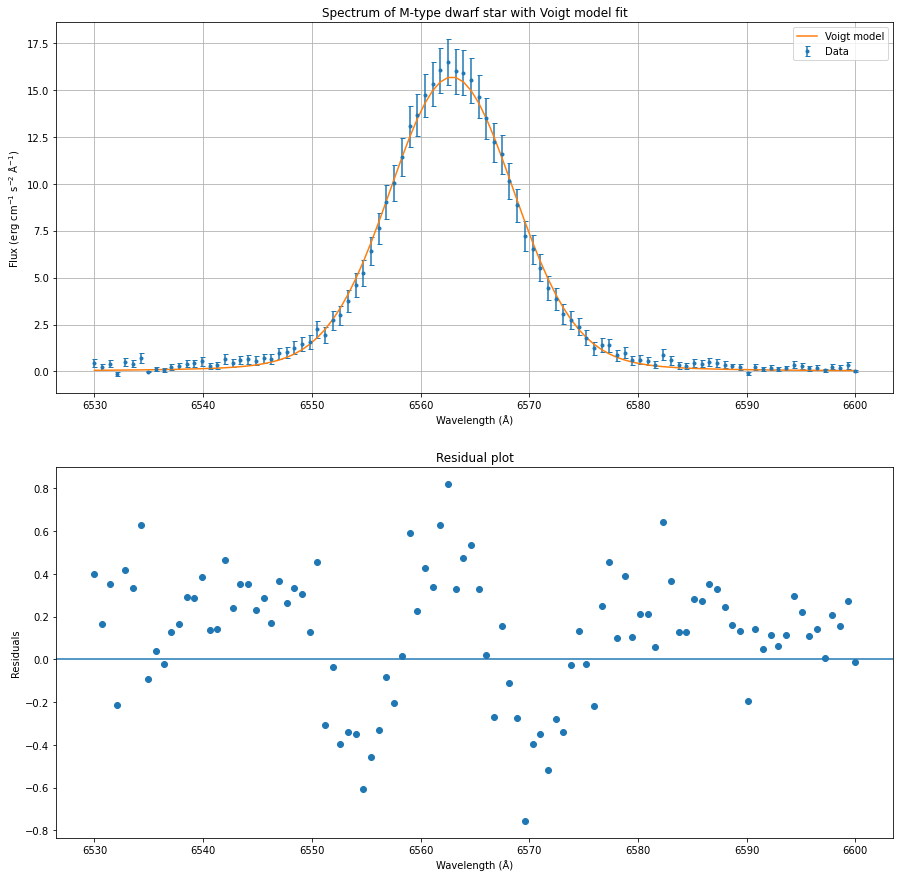

In [38]:
# Create the figure and subplots
fig, ax = plt.subplots(nrows=2, figsize=(15,15))

# Plot the best fit Voigt over the data
ax[0].errorbar(wavelength, flux, label = 'Data', yerr=flux_errors, fmt='o',capsize=2.5, ms=3)
ax[0].plot(wavelength, voigt(three_vi_i()[0]), label = 'Voigt model')
ax[0].set_xlabel('Wavelength (Å)')
ax[0].set_ylabel('Flux (erg cm$^{−1}$ s$^{−2}$ Å$^{−1}$)')
ax[0].set_title("Spectrum of M-type dwarf star with Voigt model fit")
ax[0].legend()
ax[0].grid()

''' Note residuals are not normalised as per the question '''
# Plot the residuals
residuals = (flux - voigt(three_vi_i()[0]))   # / flux_errors
ax[1].scatter(wavelength, residuals)
ax[1].set_ylabel("Residuals")
ax[1].set_xlabel("Wavelength (Å)")
ax[1].set_title("Residual plot")
ax[1].axhline(0)

The residual plot here is visually more random, implying that the data is better described by a Voigt model than a Gaussian, however there is still a visible pattern to the residuals, indicating that a more complex model is still required.

### (vii) Finally, comment on the differences between the two fits.

The Voigt model appears to be a better fit than the Gaussian model, though both show patterns in the residual plot and the lag plots below. This indicates that the models may not have enough parameters to fully describe the data and a more complex model would better describe the data. The Voigt model appears to be a better fit as it has a smaller chisq_min value of 149, vs the Gaussian model's chisq_min of 212, showing that the sum of the residuals is smaller and hence the model matches the data better. The Voigt model has a reduced chisq value of 1.55 vs the Gaussian model's reduced chisq of 2.19. For our degrees of freedom, the model should be questioned if the reduced chisq value is greater than 1.5, which both of our models are, though the Voigt model is just over this value, where the Gaussian model is significantly over the this value. This indicates that the Voigt model is a better fit than the Gaussian. The probability of obtaining a value of chisq equal to, or greater than chisq_min is greater for the Voigt model, though it is not greater than 10$^{-4}$ for either model, indicating that the models should be rejected. Lastly, the residual plots for both models shows a clear pattern, though less so for the Voigt model. This implies that the data may be better represented by a model with more paramaters/a more complex model, as the current parameters are not capturing the entire model and this missed information is represented in the residuals plot. The lag plots below show that the residuals of the Voigt model have a weaker correlation and are more concentrated at the centre demonstrating a Durbin–Watson statistic closer to 2 than the Gaussian model. Overall, the statistical analysis shows that the Voigt model better describes the data than the Gaussian model, however it does not provide a rigorous description as it has a very low probability of obtaining a value of chisq equal to, or greater than chisq_min, has a reduced chisq value greater than 1.5 and the residuals show a correlation. This correlation could be better quantified by finding the correlation in the lag plot and determining the exact value of the Durbin–Watson statistic.

Text(0, 0.5, 'Residuals')

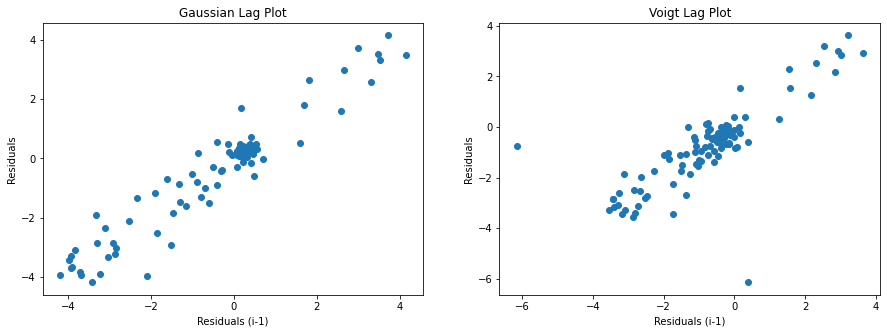

In [39]:
# Create lag plots
# Gaussian
residuals_gauss = list(flux - gaussian(three_ii()[0]) / flux_errors)
ddict_gauss = {"Residuals":residuals_gauss}
df_gauss = pd.DataFrame(data=ddict_gauss)
df_gauss["Residuals-1"] = df_gauss.iloc[:,0].shift(1)
df_gauss = df_gauss.iloc[1:]

# Voigt
residuals_voigt = list(flux - voigt(three_vi_i()[0]) / flux_errors)
ddict_voigt = {"Residuals":residuals_voigt}
df_voigt = pd.DataFrame(data=ddict_voigt)
df_voigt["Residuals-1"] = df_voigt.iloc[:,0].shift(1)
df_voigt = df_voigt.iloc[1:]

# Plot lag plots
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
# Gaussian
ax[0].scatter(df_gauss["Residuals-1"], df_gauss["Residuals"])   # Plot Gaussian lag plot
ax[0].set_title("Gaussian Lag Plot")
ax[0].set_xlabel("Residuals (i-1)")
ax[0].set_ylabel("Residuals")
# Voigt
ax[1].scatter(df_voigt["Residuals-1"], df_voigt["Residuals"])   # Plot Voigt lag plot
ax[1].set_title("Voigt Lag Plot")
ax[1].set_xlabel("Residuals (i-1)")
ax[1].set_ylabel("Residuals")

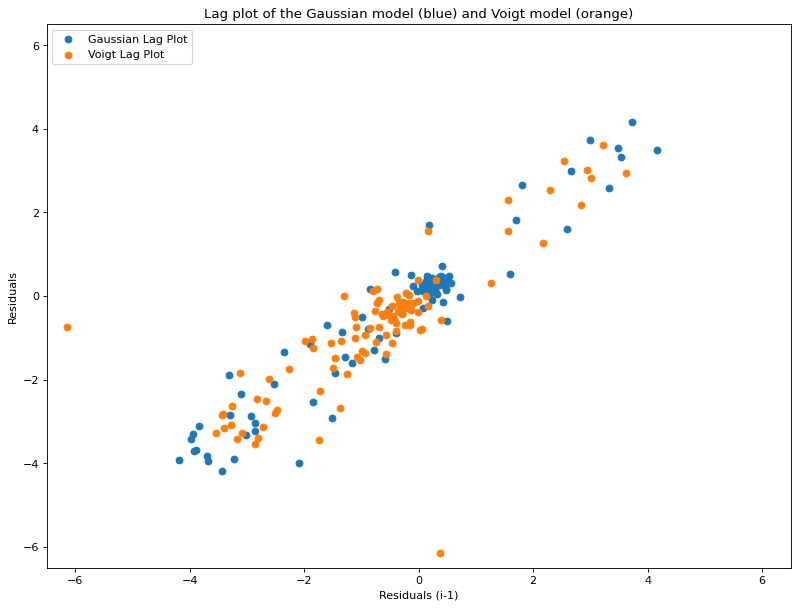

In [40]:
# Lag plots overlayed
plt.figure(figsize=(12, 9), dpi=80)
plt.scatter(df_gauss["Residuals-1"], df_gauss["Residuals"], label="Gaussian Lag Plot")
plt.scatter(df_voigt["Residuals-1"], df_voigt["Residuals"], label="Voigt Lag Plot")
plt.xlim(-6.5, 6.5)
plt.ylim(-6.5, 6.5)
plt.xlabel("Residuals (i-1)")
plt.ylabel("Residuals")
plt.title("Lag plot of the Gaussian model (blue) and Voigt model (orange)")
plt.legend(loc="upper left")

### Bonus: What could you do to improve the fit? You can either write an answer into the markdown cell below, or you could add some code to demonstrate what you could do, or both.

To improve the fit, a model with more parameters could be used to help remove the correlation within the residuals

## Question 4: Particle growth (10 marks)

In this question we shall analyse data from an experiment measuring the aggregation of particles in a solution.

\begin{array}{lcc}
\hline
{\rm time~(s)} & {\rm size~(nm)} & {\rm error~(nm)}\\
0.13 & 117 & 30\\
0.17 & 128 & 11\\
0.44 & 200 & 20\\
0.87 & 331 & 15\\
2.10 & 514 & 30\\
6.03 & 887 & 40\\
17.96 & 1703 & 40\\
42.01 & 2598 & 43\\
\hline
\end{array} 

The experiment involves measuring the growth of the particles as a function of time described by the equation $r = r_{0}t^{n}$.


The model to describe the data has two parameters: an initial particle size $r_{0}$, and a growth parameter $n$. 

(i) Perform a $\chi^2$ minimisation. What is the value of $\chi^2_{min}$? <br>
(ii) What are  the  best-fit parameters?<br>
(iii) What is the reduced $\chi^2$ value? How many degrees of freedom are there?<br>
(iv) Does the model give a good description of the data?<br>


### (i) Perform a $\chi^2$ minimisation. What is the value of $\chi^2_{min}$?

In [41]:
time = [0.13, 0.17, 0.44, 0.87, 2.10, 6.03, 17.96, 42.01]
size = [118, 128, 200, 331, 514, 887, 1703, 2598]
size_errors = [30, 11, 20, 15, 30, 40, 40, 43]

def chisqfunc(x):
    
    r0, n = x
    model = r0 * (time**n)
    chisq = np.sum(((size - model)/size_errors)**2)
    
    return chisq

In [42]:
def four_i():
    '''using the chisqfunc from the previous cell, perform a chi-square minimisation and return the
    best fit parameters and chi-square minimum.
    Please make sure that the answer is a list/array of three floats'''
    
    x0 = np.array([350, 0.5])  # Give an initial "guess"

    result =  minimize(chisqfunc, x0)   # Use minimise function to minimise chisq
    
    best_fit_r0, best_fit_n = result.x
    min_chisq = chisqfunc(result.x)
    
    return best_fit_r0, best_fit_n, min_chisq

print(four_i())

(344.8045218583843, 0.5428279582455139, 4.1168000086953045)


### (ii) What are  the  best-fit parameters?

In [44]:
def four_ii():
    '''Your function must return the best fit r0 and exponent n from the function four_i.
    Please make sure that the answer is a list/array of two floats'''
    r0, n, min_chisq = four_i()
    return np.round(r0, 0), np.round(n, 3) # Rounding comes from errors deduced from inverse hessian matrix

print(four_ii())

(345.0, 0.543)


### (iii) What is the reduced $\chi^2$ value? How many degrees of freedom are there?

In [46]:
def four_iii():
    '''your function should return the reduced chi-square as well as the number of degrees of freedom.
    Please make sure that the answer is a list/array of two floats'''
    N = len(time)   # Number of data points
    n = 2   # Number of parameters in our model (r0 and n)
    df = N - n   # Degrees of freedom
    
    r0, n, min_chisq = four_i()
    
    red_chisq = min_chisq / df
    
    return red_chisq, df

print(four_iii())

(0.6861333347825508, 6)


### (vi) Does the model give a good description of the data? (Hint: think about what other tests you could perform to test the null hypothesis)

We can test the null hypothesis a few different ways - for example reduced chisq value, the chisq probability distribution function and checking for structure in the residuals. Here we have a reduced chisq value of ~ 0.69, which is reasonably close to 1 and hence indicates a good fit. Below we have plotted the normalised residuals where we can see no correlation/pattern, indicating that all features of our data are captured by our model. We have also calculated the Durbin-Watson statistic as 2.9. Below we have also calculated the probability of obtaining a value of chisq equal to, or greater than chisq_min to be ~ 4.5 x 10$^{-2}$, which is between P = 0.5 and 10$^{-3}$. Considering all of these factors it appears that the model does indeed give a good description of the data however the number of data points (N=7) is low and so collecting more data points may give a better indictation as to whether the model is a good fit.

Text(0, 0.5, 'Residuals')

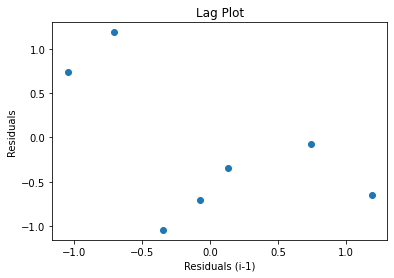

In [49]:
''' Lag plot '''
def func(time):
    # Return value predicted by model at given time
    return 345 * (time ** 0.543)

# Find predicted size for each time in dataset
size_model = []
for t in time:
    size_model.append(func(t))

# Calculate normalised residuals
residuals = list((np.array(size) - np.array(size_model)) / np.array(size_errors))

# Use pandas dataframe to move residuals out-of-kilter by one row
ddict = {"Residuals":residuals}
df = pd.DataFrame(data=ddict)
df["Residuals-1"] = df.iloc[:,0].shift(1)
df = df.iloc[1:]

# Plot lag plot
plt.scatter(df["Residuals-1"], df["Residuals"])
plt.title("Lag Plot")
plt.xlabel("Residuals (i-1)")
plt.ylabel("Residuals")

In [55]:
''' Durbin-Watson '''
df["Res - Res-1"] = (df["Residuals"] - df["Residuals-1"])**2
d_w = sum(df["Res - Res-1"]) / sum(df["Residuals"]**2)
d_w

2.912877167629171

In [50]:
def p_chi():
    ''' Returns probability of obtaining a value above chisq_min'''
    N = len(size)   # Number of data points
    n = 2   # Number of parameters in model
    df = N - n   # Degrees of freedom
    
    # The below definitions are from Measurements and their Uncertainties, which states that the chisq probability
    # distribution has mean=df, stdev=sqrt(2df)
    chisq_mean = df
    chisq_stdev = np.sqrt(2*df)
    chisq_min = four_i()[2]
    
    k = df / 2   # Define k to simplify below formula
    
    # Probability of randomly choosing chisq == chisq_min
    X_chisq_min = ((chisq_min ** (k - 1)) * np.exp( -float(chisq_min) / 2)) / ((2 ** k) * np.math.factorial(np.round(k,0)-1))
    
    # Find distance of chisq_min from mean
    z = (chisq_mean - X_chisq_min) / chisq_stdev
    
    # Calculate probability of chisq being above chisq_min
    x = ((chisq_mean + (z * chisq_stdev)) - chisq_mean) / ((np.sqrt(2) * chisq_stdev))
    above_Zsigma = 1 - (0.5 * (1 + erf(x)))
    
    return above_Zsigma

p_chi()

0.04522625472521069